<div style="margin: 0 auto; max-width: 900px;  background-color: #F95700FF">
    <div style="background-image: url('https://cdn-media-1.freecodecamp.org/images/C9OQH-2w3g-1Ayj08mjYLwlpI46QAbxgtyqa');
                background-size: contain; /* Changed background size */
                background-repeat: no-repeat; /* Prevent background image from repeating */
                background-position: left; /* Center the background image */
                padding: 50px;
                font-family: 'Pacifico' ; /* Changed font family */
                border: 5px solid #F95700FF; /* Changed border color */
                border-radius: 10px;
                color: #990011FF; /* Changed text color */
                text-align: right;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: white;">Muffin Vs Chihuahua Images Classification</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>

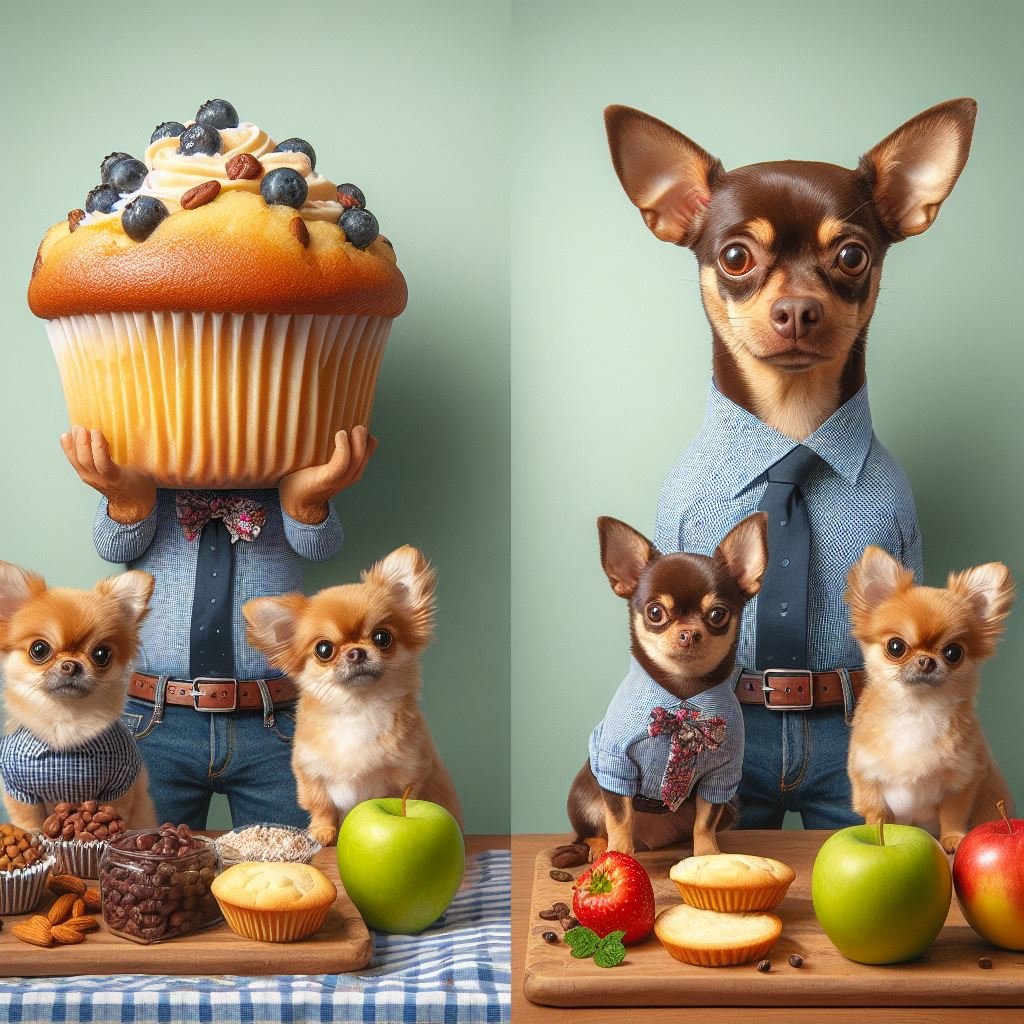

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">About || Author</p>

<div style="border: 5px groove #F95700FF; padding: 20px; max-width: 1500px; background-color: #F95700FF; color: white;">
    <p>
        I am <b>Muhammad Abdullah</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/D4D03AQEho5bPVChHpA/profile-displayphoto-shrink_100_100/0/1712892057663?e=1720051200&v=beta&t=9LuEqrMOFJvp8-xxHRG2SCaYpI28dUemihllpvUFZRk" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 100%; border: 5px solid white;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://github.com/muhammadabdullah0303" target="_blank">GitHub</a> and <a href="https://www.linkedin.com/in/muhammad-abdullah-6b84b4297/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>


<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Import || Utiliz</p>

In [ ]:
#Import Os and Basis Libraries
import cv2
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from pathlib import Path
import imghdr
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")
# paellet 
# palette = ["skyblue", "#FFDAB9"]
palette = ['#F95700FF', '#00A6FF']
print_boxed_zigzag_heading('Setup Intilized')

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Load || Data</p>

In [ ]:
# Function 4 Data Overview
def print_boxed_blue_heading(heading):
    gradient = [Fore.BLUE, Fore.CYAN, Fore.GREEN, Fore.YELLOW, Fore.RED, Fore.MAGENTA]
    print("\n" + "+" * (len(heading) + 20))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"|| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"|| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("+" * (len(heading) + 20))
def print_boxed_zigzag_heading(heading):
    gradient = [Fore.BLUE, Fore.CYAN, Fore.GREEN, Fore.YELLOW, Fore.RED, Fore.MAGENTA]
    print("\n" + f"{Fore.YELLOW}" + "╭" + "─" * (len(heading) + 20) + "╮" + Style.RESET_ALL)  # Change line color to yellow
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"{Fore.CYAN}│ {word} │" + Style.RESET_ALL) 
        else:
            print(f"{gradient[len(word) % len(gradient)]}│ {word}", end=" ")
    print(f"{Fore.YELLOW}" + "╰" + "─" * (len(heading) + 20) + "╯" + Style.RESET_ALL) 
    
# Load Data and Make DataFrame
def L_Data(directory_TR,directory_TE):
    filepath_TR =[]
    label_TR = []

    folds_TR = os.listdir(directory_TR)

    for fold in folds_TR:
        f_path_TR = os.path.join(directory_TR , fold)

        imgs_TR = os.listdir(f_path_TR)

        for img in imgs_TR:

            img_path_TR = os.path.join(f_path_TR , img)
            filepath_TR.append(img_path_TR)
            label_TR.append(fold)

    #Concat data paths with labels
    file_path_series_TR = pd.Series(filepath_TR , name= 'filepath')
    Label_path_series_TR = pd.Series(label_TR , name = 'label')
    df_train = pd.concat([file_path_series_TR ,Label_path_series_TR ] , axis = 1)
    
    filepath_TE =[]
    label_TE = []

    folds_TE = os.listdir(directory_TE)

    for fold in folds_TE:
        f_path_TE = os.path.join(directory_TE , fold)

        imgs_TE = os.listdir(f_path_TE)

        for img in imgs_TE:

            img_path_TE = os.path.join(f_path_TE , img)
            filepath_TE.append(img_path_TE)
            label_TE.append(fold)

    #Concat data paths with labels
    file_path_series_TE = pd.Series(filepath_TE , name= 'filepath')
    Label_path_series_TE = pd.Series(label_TE , name = 'label')
    df_test = pd.concat([file_path_series_TE ,Label_path_series_TE ] , axis = 1)   
    
    # Display head of the training dataset nicely
    print_boxed_zigzag_heading('Train Data')
    print_boxed_blue_heading(f"The Head Of Train Dataset is:")
    display(HTML(df_train.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: red;">')))
    print('\n')

    # Display tail of the training dataset nicely
    print_boxed_blue_heading("The Tail Of Train Dataset is:")
    display(HTML(df_train.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: red;">')))
    print('\n')

    print_boxed_blue_heading(f'The Shape of the Train Data is {df_train.shape} |')
    print_boxed_blue_heading(f'- 1.The No of Rows is {df_train.shape[0]} |')
    print_boxed_blue_heading(f'- 2.The No of Cols is {df_train.shape[1]}|')

    print('\n')
    
    # Display head of the training dataset nicely
    print_boxed_zigzag_heading('Test Data')
    print_boxed_blue_heading(f"The Head Of Test Dataset is:")
    display(HTML(df_test.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: red;">')))
    print('\n')

    # Display tail of the training dataset nicely
    print_boxed_blue_heading("The Tail Of Test Dataset is:")
    display(HTML(df_test.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: red;">')))
    print('\n')

    print_boxed_blue_heading(f'The Shape of the Test Data is {df_test.shape} |')
    print_boxed_blue_heading(f'- 1.The No of Rows is {df_test.shape[0]} |')
    print_boxed_blue_heading(f'- 2.The No of Cols is {df_test.shape[1]}|')

    print('\n')
    
    return df_train , df_test
print_boxed_zigzag_heading('Load Data Function Intilized ')

In [ ]:
# # Directory containing the "Train" folder
directory_T = "/kaggle/input/muffin-vs-chihuahua-image-classification/train"
# Directory containing the "Train" folder
directory_TE = "/kaggle/input/muffin-vs-chihuahua-image-classification/test"
# Train Data and Test Data 
tr_d , te_d = L_Data(directory_T,directory_TE)

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Images || Check </p>

In [ ]:
# Data Dir
data_dir = directory_T
# Image Extension
image_extensions = [".png", ".jpg"]  

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
else:
    print_boxed_zigzag_heading('Data is Perfectly Fine!')

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Train || Test || Generators </p>

In [ ]:
# Function to Generate Augmentated DS
def Generator_ds_with_ImageGenerator(train_dir, test_dir, img_size, batch_size=32):
    # Train Data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    print_boxed_blue_heading('Training Images:')
    train_ds = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        seed=123
    )

    # Validation Data
    print_boxed_blue_heading('Validation Images:')
    validation_ds = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        seed=123
    )

    # Test Data
    test_datagen = ImageDataGenerator(rescale=1./255)

    print_boxed_blue_heading('Testing Images:')
    test_ds = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_ds, validation_ds, test_ds

In [ ]:
#Data_Dir Train And Test
test_dir = directory_TE
train_dir = directory_T

# Image Size
IMAGE_SIZE = (224, 224)

# Generate Data 
train_ds , validation_ds , test_ds = Generator_ds_with_ImageGenerator(train_dir,test_dir,IMAGE_SIZE)
print_boxed_zigzag_heading('Data Generated Successfully')

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Train || Test || Class Count </p>

In [ ]:
# Train Count
print_boxed_zigzag_heading('Train Class Distribution')
single_plot_distribution('label',tr_d)

In [ ]:
# Test Count
print_boxed_zigzag_heading('Test Class Distribution')
single_plot_distribution('label',te_d)

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Train || Test || Images </p>

In [ ]:
# Function to Show Images
def visualize_images(path, num_images=20):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)
    
    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))
    
    # Calculate the number of rows and columns for subplots
    num_rows = 2
    num_cols = 5
    
    # Create a figure and axis object to display images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), facecolor='#F95700FF')
    
    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Calculate the row and column index for the current subplot
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        # Display the image
        axes[row_idx, col_idx].imshow(image)
        axes[row_idx, col_idx].axis('off') 
        axes[row_idx, col_idx].set_title(image_filename)  
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()


<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:150%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Chihuahua || Images</p>

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua"

# Visualize some images from the specified path
print_boxed_zigzag_heading('AFRICAN LEOPARD Images')
visualize_images(path_to_visualize, num_images=10)


<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:150%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Muffin || Images</p>

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin"

# Visualize some images from the specified path
print_boxed_zigzag_heading('CARACAL Images')
visualize_images(path_to_visualize, num_images=10)

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Model || Building || Transfer Learning </p>

**Transfer learning is a machine learning technique where knowledge gained from training one model is applied to a different but related task. Instead of starting from scratch, a pre-trained model is used as a starting point. By leveraging features learned during the training of the pre-trained model, the new model can achieve better performance with less data and computation. This approach is particularly useful when working with limited labeled data or computational resources. Transfer learning involves fine-tuning the pre-trained model by adjusting its parameters to better suit the new task. This process allows for faster convergence and improved generalization to the new task. Overall, transfer learning accelerates the development of models for various tasks by capitalizing on the knowledge learned from previous tasks.**

In [ ]:
# # Define the URL of the model
# url = "https://tfhub.dev/google/bit/m-r50x1/1"

# # Load the model from the URL
# model_E = hub.KerasLayer(url)

# # Set the model to be non-trainable
# model_E.trainable = False

# Load the pre-trained DenseNet121 model without the top classification layer
DenseNet121_base = DenseNet121(weights='imagenet',
                                    include_top=False, 
                                   input_shape=(224, 224, 3),
                                     pooling = 'avg'
                                   )

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False
print_boxed_zigzag_heading('Base Model Intilized')

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Compile || Train || Model </p>

- **This Function is Used to Intilized The base Model and Add Properties Likes , Dropout , Model Name , Base_model , Activation Function , Num of Classes.**
- **The User Can give Input and the Function Run According to The Input.**
- **You Can Do More modifications in This According to Your Use.**
- **Happy Kaggle**

In [ ]:
print_boxed_zigzag_heading('Function Intilized')
def M_B(M_name,Base ,EPO, Drop_Val,A_Func,NUM_CLASS):
    # Define the name for your model
    model_name = M_name
    # Build the model
    model = Sequential(name=model_name)

    # Add the pre-trained DenseNet121_base 
    model.add(Base)

    # Batch Normalization
    model.add(BatchNormalization())

    # Dropout 
    model.add(Dropout(Drop_Val))

    # Add a dense layer with 220 units and ReLU activation function
    model.add(Dense(50, activation='relu'))

    # Add the output layer with 10 units and Softmax activation function
    model.add(Dense(NUM_CLASS, activation=A_Func))

    # Compile
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Build the model
    model.build((None, 224, 224, 3))

    # Print model summary
    print(model.summary())
    
    #Early_Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    #Fitting Model
    history = model.fit(train_ds,
                            epochs= EPO,
                            validation_data = validation_ds,
                            callbacks = early_stopping)
    
    return history, model

In [ ]:
# Train Model
history , model = M_B("Abdullah_Model",
              DenseNet121_base,
              5,
              0.25,
              'softmax',
              2)

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Val Loss  || Accuracy </p>

- How To Evaluate on Test Data , Here We Have a Function Names as Evaluate, We Just Call The Function and Pass Test or Val Data It will Provide Us Loss and Accuracy.
```
model.evaluate()
```

In [ ]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

<a id="Import"></a>
# <p style="background-color: #F95700FF; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;"> Predictions || Unseen || Data </p>

In [ ]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 30
num_images_per_row = 5  # Set the number of images per row
num_rows = 6

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images: 
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

<div style="margin: 0 auto; max-width: 850px;  background-color: #F95700FF;">
    <div style="background-image: url('https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExNmZ2YWt2eDkyNHl1bmhxejM5enJyaXZla2k1NzF2bDFiMTZxa2dpdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l4FAPaGGeB7D1LfIA/giphy.gif');
                background-size: contain; /* Changed background size */
                background-repeat: no-repeat; /* Prevent background image from repeating */
                background-position: left; /* Center the background image */
                padding: 50px;
                font-family: 'Pacifico'; /* Changed font family to Roboto */
                border: 4px solid #F95700FF; /* Changed border color */
                border-radius: 20px;
                color: #DAA03DFF; /* Changed text color */
                text-align: right;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: White;">Thanks For Visiting Happle Kaggle</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>